<a href="https://colab.research.google.com/github/IImbryk/course_2023/blob/main/3_MSE/3_MSE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ДЗ 2: Линейная регрессия



___
# Цель

*~15 minutes*

Мы начинаем с простой линейной регрессии, используя оптимизацию методом наименьших квадратов.
В этом уроке мы узнаем, как подогнать простую линейную модель к данным. А так же:
- Как рассчитать среднеквадратичную ошибку (MSE)
- Как параметры модели влияют на MSE
- Как найти оптимальные параметры модели анаитически с помощью методом наименьших квадратов.

---
# Библиотеки

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#@title Настройка рисунков
import ipywidgets as widgets       # interactive display
%config InlineBackend.figure_format = 'retina'
plt.style.use("https://raw.githubusercontent.com/NeuromatchAcademy/course-content/main/nma.mplstyle")

In [3]:
#@title Дополнительные функции отрисовки

def plot_observed_vs_predicted(x, y, y_hat, theta_hat):
  """ Plot observed vs predicted data

  Args:
    x (ndarray): observed x values
    y (ndarray): observed y values
    y_hat (ndarray): predicted y values
    theta_hat (ndarray):
  """
  fig, ax = plt.subplots()
  ax.scatter(x, y, label='Observed')  # our data scatter plot
  ax.plot(x, y_hat, color='r', label='Fit')  # our estimated model
  # plot residuals
  ymin = np.minimum(y, y_hat)
  ymax = np.maximum(y, y_hat)
  ax.vlines(x, ymin, ymax, 'g', alpha=0.5, label='Residuals')
  ax.set(
      title=fr"$\hat{{\theta}}$ = {theta_hat:0.2f}, MSE = {np.mean((y - y_hat)**2):.2f}",
      xlabel='x',
      ylabel='y'
  )
  ax.legend()

---
# Раздел 1: Mean Squared Error (MSE)

Создадим простой синтетический набор данных.

Сначала мы сгенерируем несколько зашумленных выборок $x$ из [0, 10) вдоль линии $y = 1.2x$ в качестве нашего набора данных, для которого мы будем строить модель.

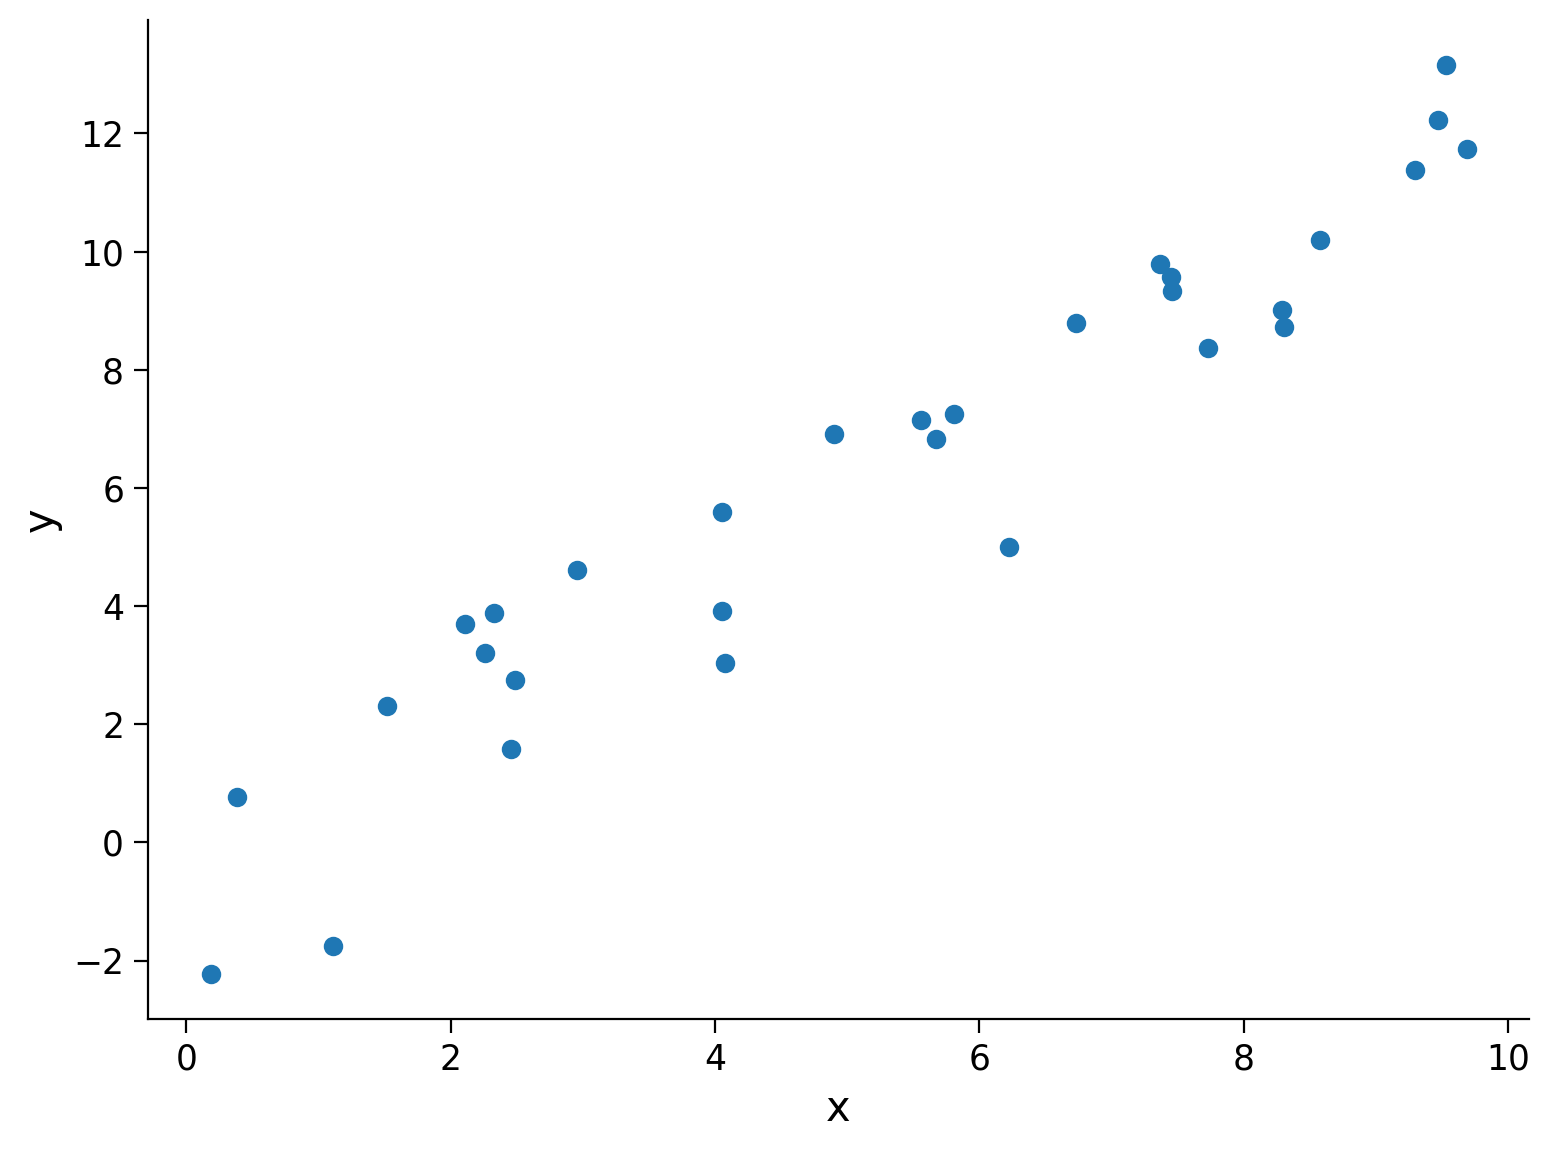

In [4]:
# @title

# @markdown Выполните ячеку для запуска симуляции

# setting a fixed seed to our random number generator ensures we will always
# get the same psuedorandom number sequence
np.random.seed(121)

# Let's set some parameters
theta = 1.2
n_samples = 30

# Draw x and then calculate y
x = 10 * np.random.rand(n_samples)  # sample from a uniform distribution over [0,10)
noise = np.random.randn(n_samples)  # sample from a standard normal distribution
y = theta * x + noise

# Plot the results
fig, ax = plt.subplots()
ax.scatter(x, y)  # produces a scatter plot
ax.set(xlabel='x', ylabel='y');

Теперь, когда у нас есть набор данных, мы можем попытаться построить модель. Используем MSE, чтобы оценить, насколько успешна конкретная оценка наклона $\hat{\theta}$  для аппроксимации данных.

Чем меньше MSE, тем лучше наша модель соответствует данным.

## Задание 1: Расчет MSE

В этом упражнении необходимо построить линейную модель для наших данных с помощью MSE.

Уравнение модели, будет иметь вид:
\begin{equation}
\hat{y}_{i}= \theta x_{i}
\end{equation}
$\mathbf{x}$, $\mathbf{y}$ - наш набор данных

Необходимо оценить параметр наклона $\hat{\theta}$ по формуле MSE:

\begin{equation}
\min _{\theta} \frac{1}{N}\sum_{i=1}^{N}\left(y_{i}-\hat{y}_i\right)^{2}
\end{equation}

Дополните код ниже, чтобы для каждого параметра $\hat\theta$ функция считала среднеквадратичную ошибку


In [5]:
def mse(x, y, theta_hat):
  """Compute the mean squared error

  Args:
    x (ndarray): An array of shape (samples,) that contains the input values.
    y (ndarray): An array of shape (samples,) that contains the corresponding
      measurement values to the inputs.
    theta_hat (float): An estimate of the slope parameter

  Returns:
    float: The mean squared error of the data with the estimated parameter.
  """

  # Compute the estimated y
  y_hat = theta_hat*x

  # Compute mean squared error
  mse = sum((y - y_hat) ** 2)*(1/n_samples)

  return mse


theta_hats = [0.75, 1.0, 1.5]
for theta_hat in theta_hats:
  print(f"theta_hat = {theta_hat}, MSE = {mse(x, y, theta_hat):.2f}")

theta_hat = 0.75, MSE = 9.08
theta_hat = 1.0, MSE = 3.01
theta_hat = 1.5, MSE = 4.52


Результат должен быть

theta_hat = 0.75, MSE = 9.08 \
theta_hat = 1.0, MSE = 3.01 \
theta_hat = 1.5, MSE = 4.52





То есть из текущего набора параметров $\hat{\theta} $ при значении $\hat{\theta} = 1.0$ мы получим лучшее приблежение линейной моделью наших данных



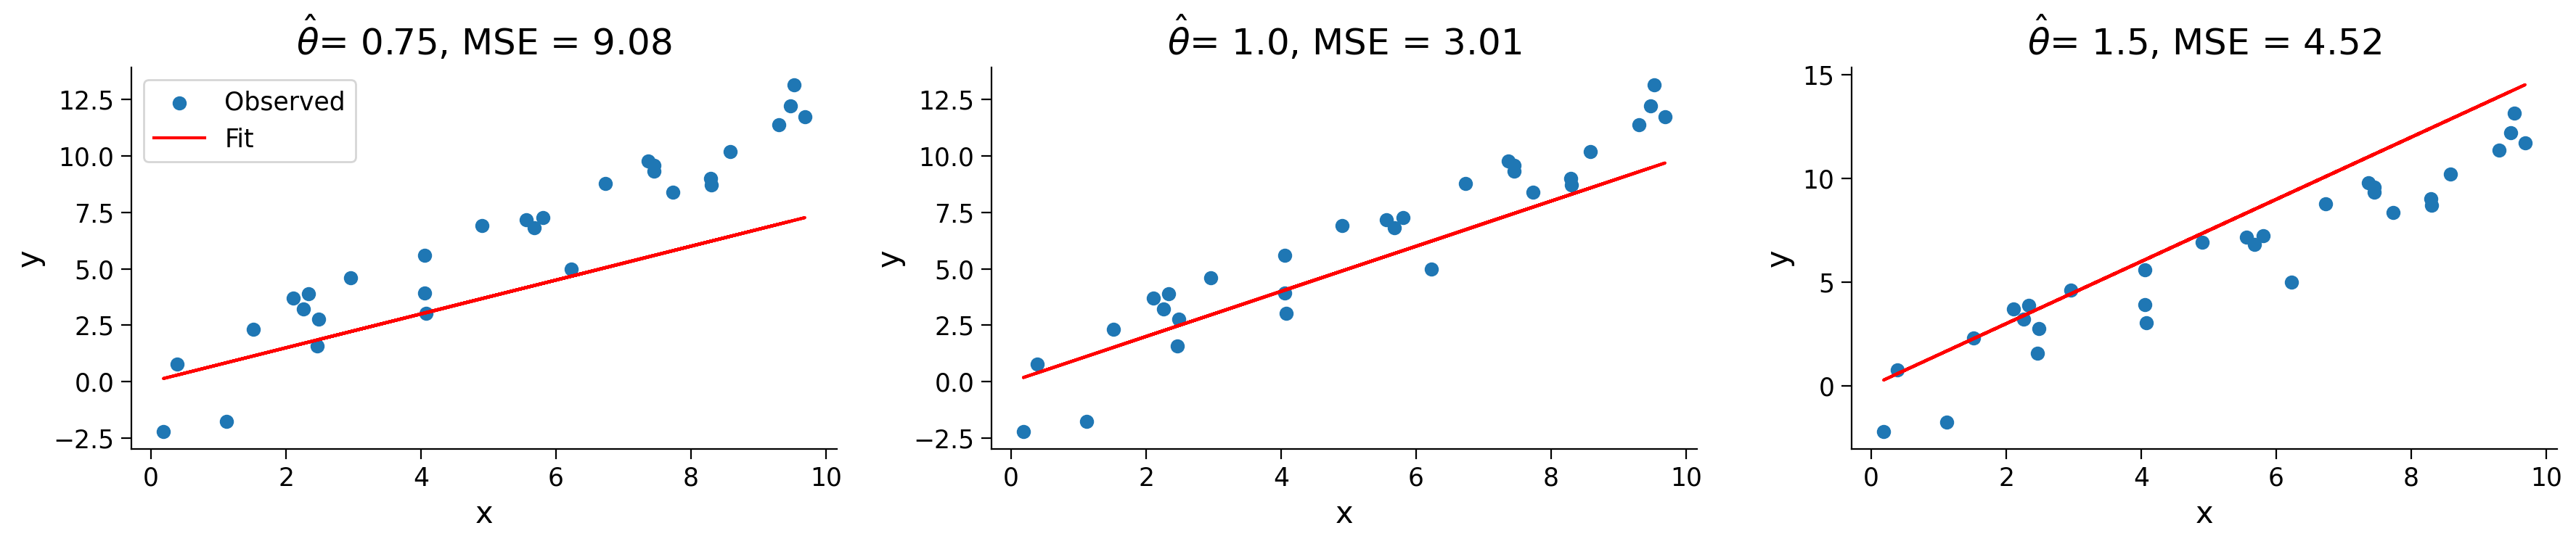

In [6]:
#@title

#@markdown Выполните код в ячейки для отображения качества модели

fig, axes = plt.subplots(ncols=3, figsize=(18, 4))
for theta_hat, ax in zip(theta_hats, axes):

  # True data
  ax.scatter(x, y, label='Observed')  # our data scatter plot

  # Compute and plot predictions
  y_hat = theta_hat * x
  ax.plot(x, y_hat, color='r', label='Fit')  # our estimated model

  ax.set(
      title= fr'$\hat{{\theta}}$= {theta_hat}, MSE = {np.mean((y - y_hat)**2):.2f}',
      xlabel='x',
      ylabel='y'
  );

axes[0].legend()

## Виджет

Используя интерактивный виджет, посмотрите, как при изменения $\theta$ меняется MSE.

Так же на графике отображена невязка (зеленые линии) - различия между наблюдаемыми и прогнозируемыми данными.

Оцените:
- Какое значение $\hat{\theta}$ приводит к самой низкой MSE?  
- Как вы считаете это хороший способ оценки $\theta$?


In [7]:
#@title

@widgets.interact(theta_hat=widgets.FloatSlider(1.0, min=0.0, max=2.0))
def plot_data_estimate(theta_hat):
  y_hat = theta_hat * x
  plot_observed_vs_predicted(x, y, y_hat, theta_hat)
  plt.show()

interactive(children=(FloatSlider(value=1.0, description='theta_hat', max=2.0), Output()), _dom_classes=('widg…

Как видите, это не самый эффективный способ найти наилучшую оценку, соответствующую нашим данным.

Мы можем выбрать разумный диапазон параметров  $\hat{\theta}$ и вычислить MSE для нескольких значений в этом интервале.

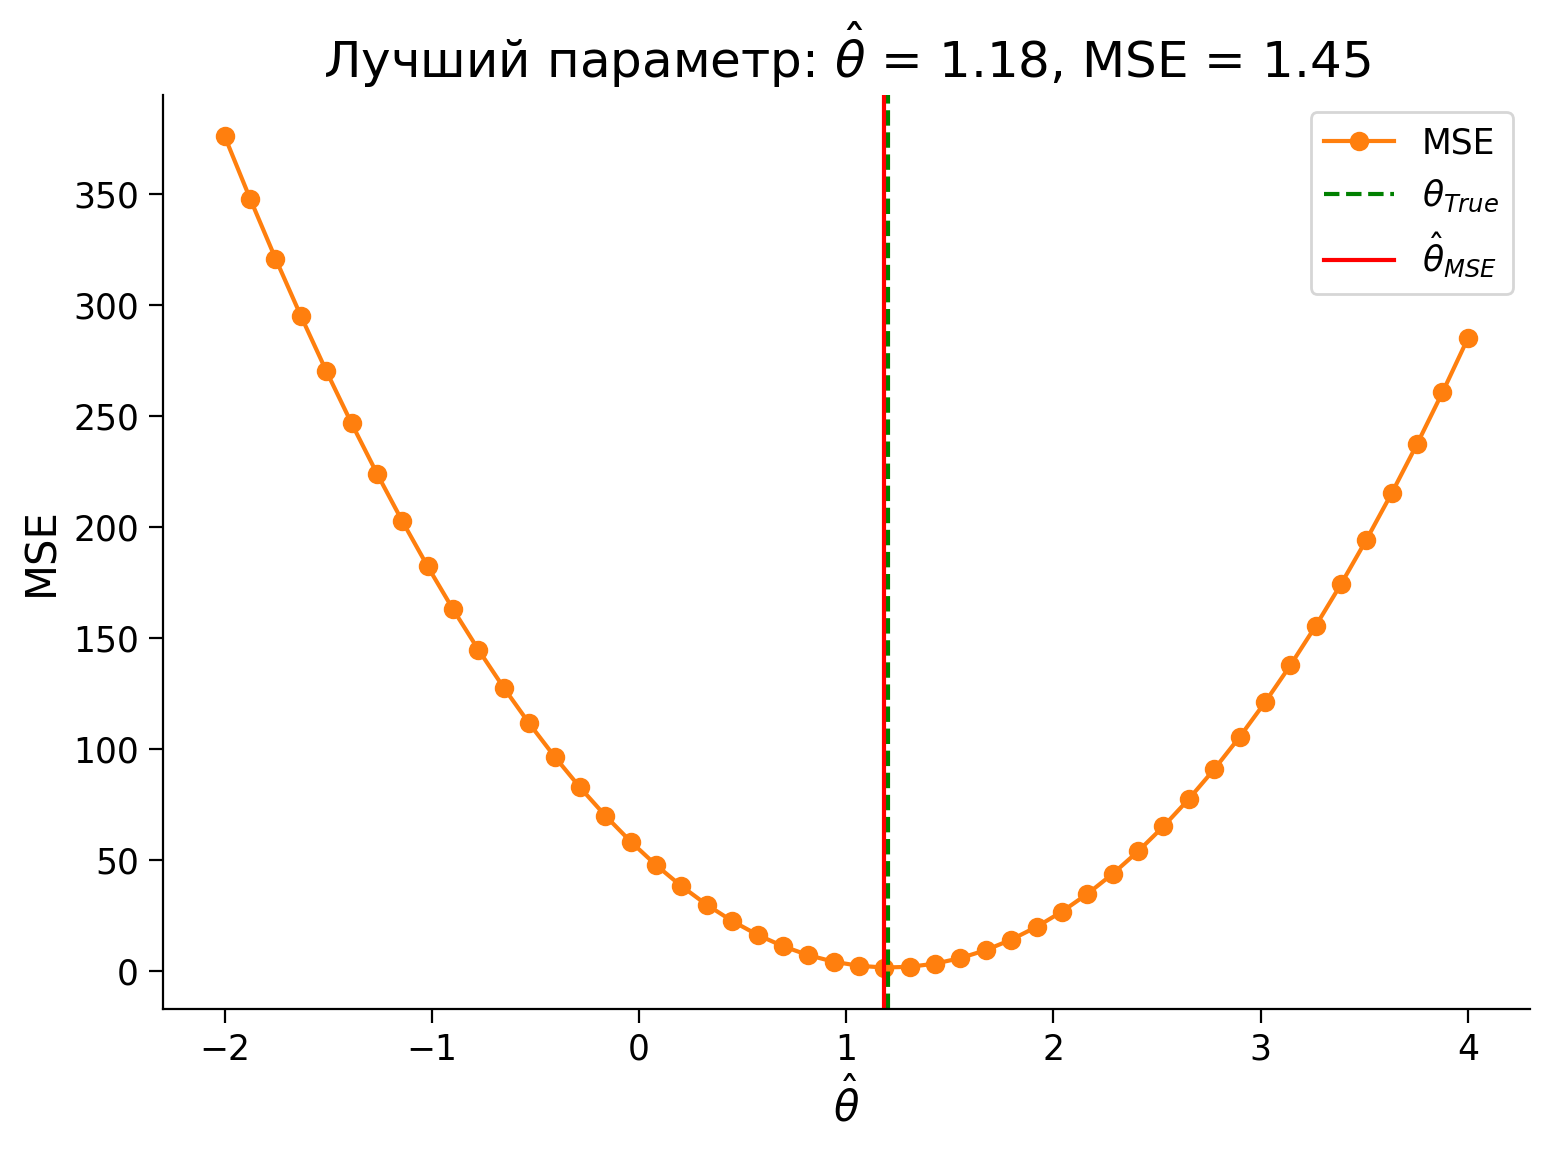

In [8]:
# @title

# @markdown Выполните код, чтобы перебрать theta_hats и для каждого расчитать MSE
# Loop over different thetas, compute MSE for each
theta_hat_grid = np.linspace(-2.0, 4.0)
errors = np.zeros(len(theta_hat_grid))
for i, theta_hat in enumerate(theta_hat_grid):
  errors[i] = mse(x, y, theta_hat)

# Find theta that results in lowest error
best_error = np.min(errors)
theta_hat = theta_hat_grid[np.argmin(errors)]


# Plot results
fig, ax = plt.subplots()
ax.plot(theta_hat_grid, errors, '-o', label='MSE', c='C1')
ax.axvline(theta, color='g', ls='--', label=r"$\theta_{True}$")
ax.axvline(theta_hat, color='r', ls='-', label=r"$\hat{{\theta}}_{MSE}$")
ax.set(
  title=fr"Лучший параметр: $\hat{{\theta}}$ = {theta_hat:.2f}, MSE = {best_error:.2f}",
  xlabel=r"$\hat{{\theta}}$",
  ylabel='MSE')
ax.legend();

Мы видим, что наилучшее соответсвии при $\hat{\theta}=1.18$ тогда MSE = 1.45. Это близко к действительному $\theta=1.2$


---
# Раздел 2: Метод наименьших квадратов

*~10 min*

В этом задании необходимо найти параметр $\hat{\theta}$ аналитически:
- Находим производную функции MSE
- Приравниваем произодну к нулю.

В результате будет получено следующее выражение
\begin{equation}
\hat\theta = \frac{\mathbf{x}^\top \mathbf{y}}{\mathbf{x}^\top \mathbf{x}}
\end{equation}

см. вывод в последней секции

## Задание 2: Оптимизация

В этом упражнении вам необходимо написать функцию, которая находит оптимальное значение $\hat{\theta}$, испольую аналитическое выражение выше. Он должен принимать аргументы $x$ и $y$ и возвращать решение ${\theta}$.

Затем построить график, используя написанную функцию для вычисления ${\theta}$ (функция для построения графика уже готова)


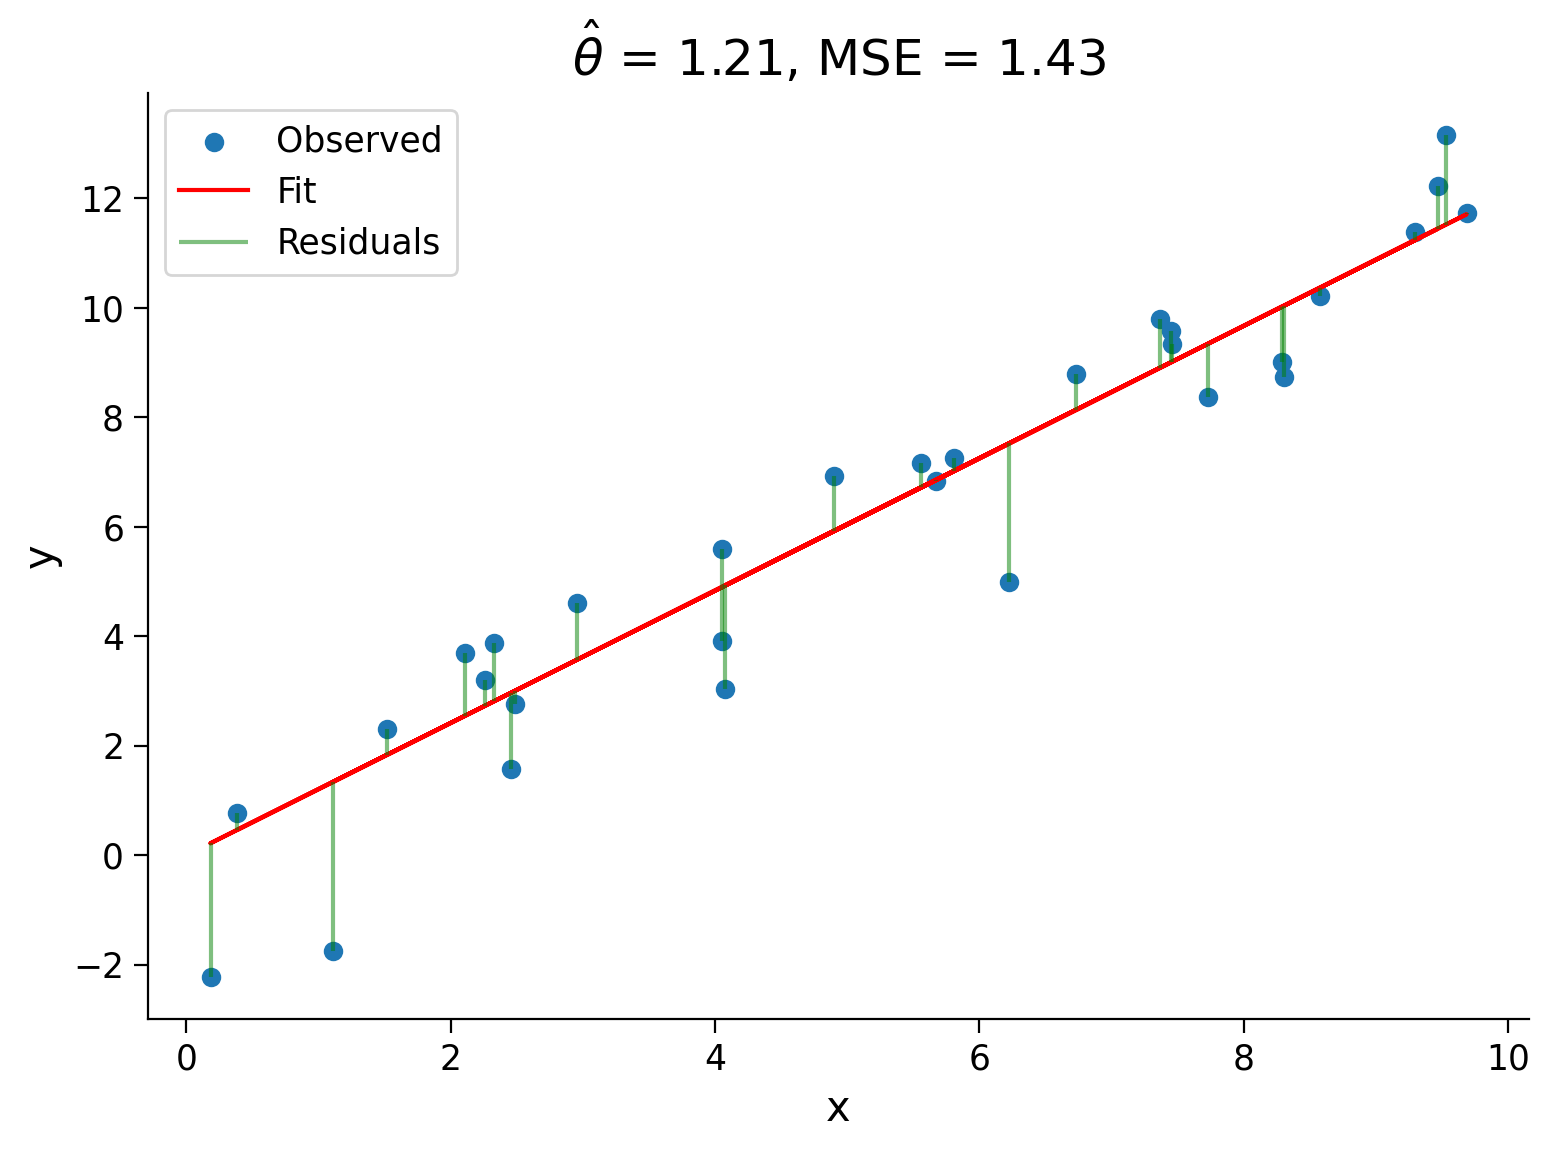

In [9]:
def solve_normal_eqn(x, y):
  """Solve the normal equations to produce the value of theta_hat that minimizes
    MSE.

    Args:
    x (ndarray): An array of shape (samples,) that contains the input values.
    y (ndarray): An array of shape (samples,) that contains the corresponding
      measurement values to the inputs.

  Returns:
    float: the value for theta_hat arrived from minimizing MSE
  """

  # Compute theta_hat analytically
  theta_hat = (np.dot(x.T, y))/(np.dot(x.T, x))

  return theta_hat


theta_hat = solve_normal_eqn(x, y)
y_hat = theta_hat * x
plot_observed_vs_predicted(x, y, y_hat, theta_hat)

*Пример выходного графика:*

<img alt='Solution hint' align='left' width=848.0 height=561.0 src=https://raw.githubusercontent.com/NeuromatchAcademy/course-content/main/tutorials/W1D2_ModelFitting/static/W1D2_Tutorial1_Solution_7a89ba24_0.png>



---
# Итог

Линейная регрессия методом наименьших квадратов — это процедура оптимизации, которую можно использовать для аппроксимации данных.
- Задача: предсказать значение $y_i$ по заданному $x_i$
- Метрика качества: $\textrm{MSE}$
- Настройка параметров модели: минимизация $\textrm{MSE}$ путем решения уравнения
- Ключевой момент: мы подбираем веса модели, определяя целевую функцию и минимизируя ее.

Примечание.

В этом примере у нас лего было найдено аналитическое решение, но на практике используются более сложные модели, поэтому так важно изучать разные методы оптимизации. Самый базовый - метод градиентного спуска.

---
# Вывод формулы

Прировняем производную $\theta$ к нулю,

\begin{align}
\frac{d}{d\theta}\frac{1}{N}\sum_{i=1}^N(y_i - \theta x_i)^2 &= 0 \\
\frac{1}{N}\sum_{i=1}^N-2x_i(y_i - \theta x_i) &= 0 \\
\theta\sum_{i=1}^N x_i^2 + \sum_{i=1}^N x_i y_i = 0
\end{align}

Выражаем $\theta$:

\begin{equation}
\hat\theta = \frac{\sum_{i=1}^N x_i y_i}{\sum_{i=1}^N x_i^2}
\end{equation}

Выражение может быть записано:

\begin{equation}
\hat\theta = \frac{\mathbf{x}^\top \mathbf{y}}{\mathbf{x}^\top \mathbf{x}}
\end{equation}


$\begin{pmatrix}
x_1 \\
x_2 \\
... \\
x_N
\end{pmatrix}^T* \begin{pmatrix}
y_1 \\
y_2 \\
... \\
y_N
\end{pmatrix} = (x_1, x_2, ...., x_N) * \begin{pmatrix}
y_1 \\
y_2 \\
... \\
y_N \end{pmatrix} = x_1y_1 + x_2y_2 + ... + x_Ny_N = \sum_{i=1}^N x_i y_i $


